# MATH&ML-9. Математика ансамблевых методов

## 1. Введение

✍ Представьте, что вы выполняете важный проект по машинному обучению. Конечно, вы можете делать всё самостоятельно, но если вы дополнительно узнаете мнение коллег, попросите ментора проверить ваши расчёты, найдёте как можно больше информации по вашей теме, то точно получите наилучший результат, ведь вы учтёте не только свои знания и выводы, но и информацию от других компетентных людей.

Составление прогнозов в машинном обучении может следовать такой же логике: один алгоритм часто даёт далёкий от желаемой точности прогноз, ведь у каждого метода есть свои ограничения, и в целом создание модели, которая строит очень близкие к реальности предсказания, — достаточно сложная задача. Однако если мы обучим на наших данных несколько моделей и обобщим результаты определённым образом, то сможем получить куда более точный результат.

Такой алгоритм решения задач машинного обучения называется **ансамблем моделей**.

**Ансамбль моделей** — это метод, в котором несколько алгоритмов (или вариации одного и того же) обучаются на одних данных, а итоговый прогноз строится на основе всех полученных от моделей прогнозов.

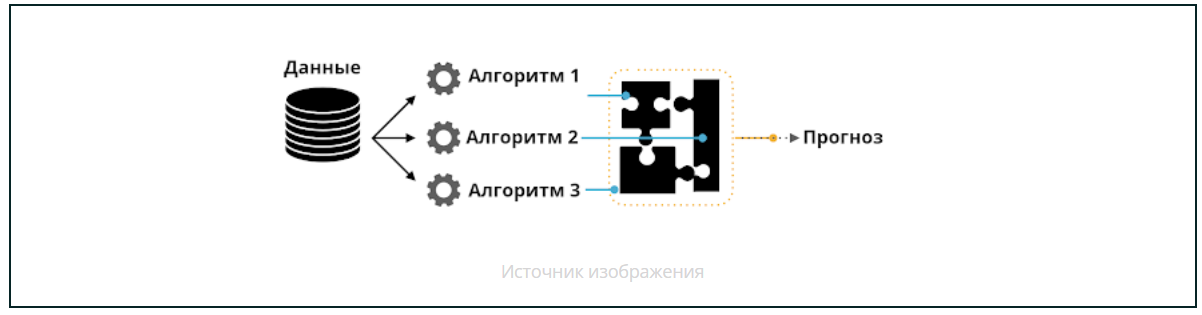

Вы уже встречались с ансамблями, однако последние модули существенно обогатили ваши знания по математике, и теперь вы сможете изучить математическую основу и тонкости данных методов: особенности настройки параметров, различные библиотеки, нюансы применения тех или иных ансамблей. Это сделает вас более компетентными специалистами, глубоко понимающими суть применяемых методов.

Чтобы дальнейшее знакомство с ансамблями прошло успешно, давайте повторим ряд понятий из предыдущих модулей. Необходимо вспомнить как математические термины, так и основы машинного обучения, с которыми вы уже сталкивались: это облегчит вам изучение данного модуля. Если вы не очень хорошо помните некоторые из тем, затрагиваемые в заданиях, рекомендуем вам вернуться к соответствующим модулям и освежить знания.

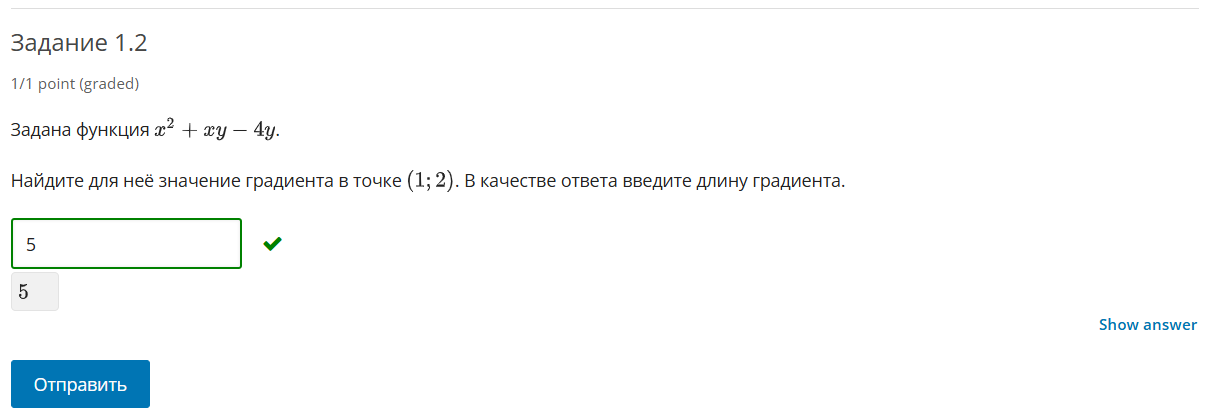

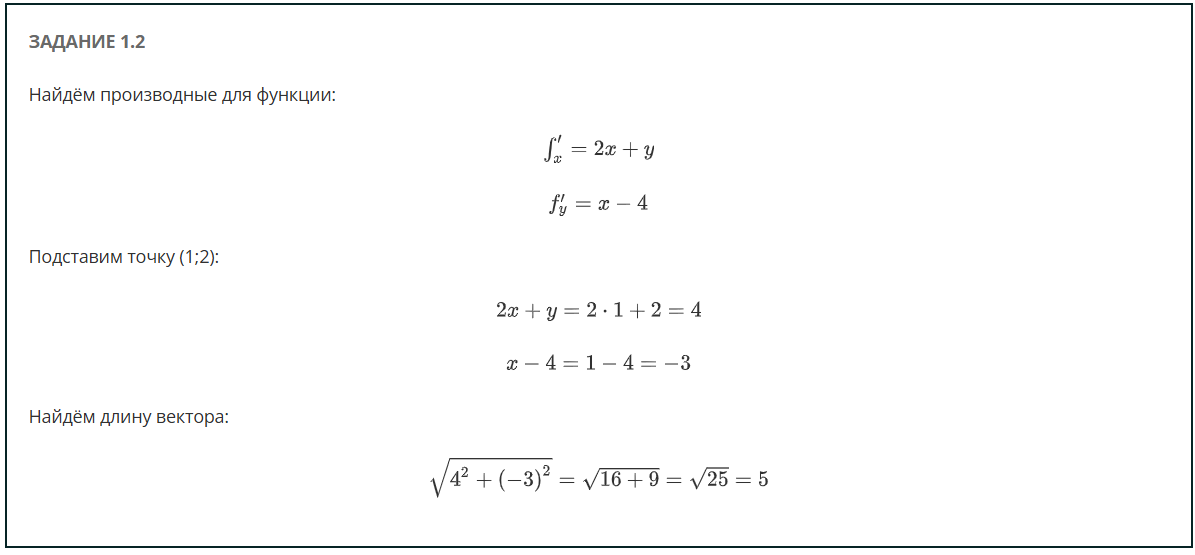

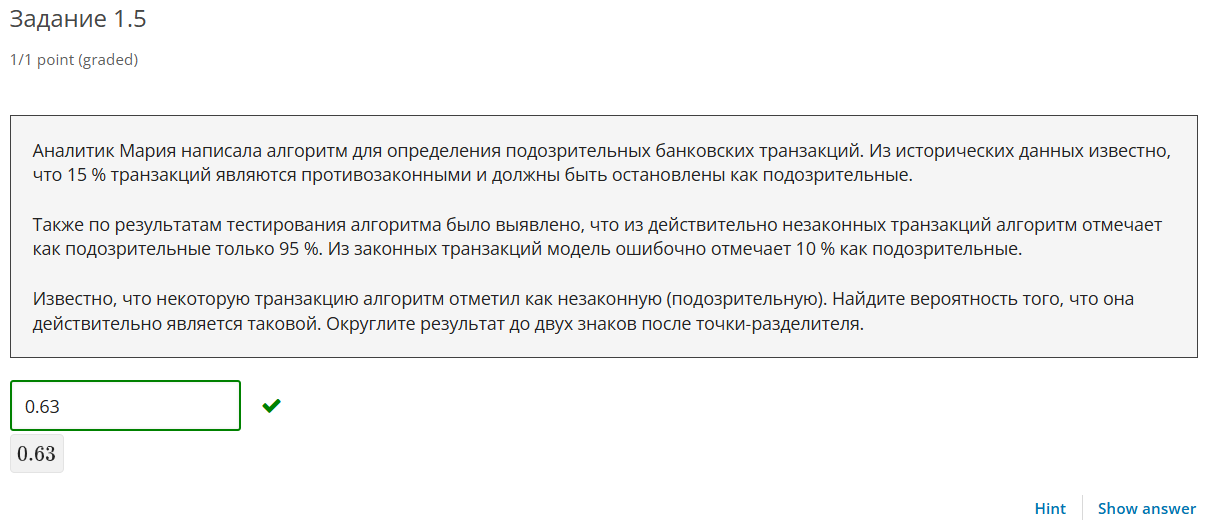

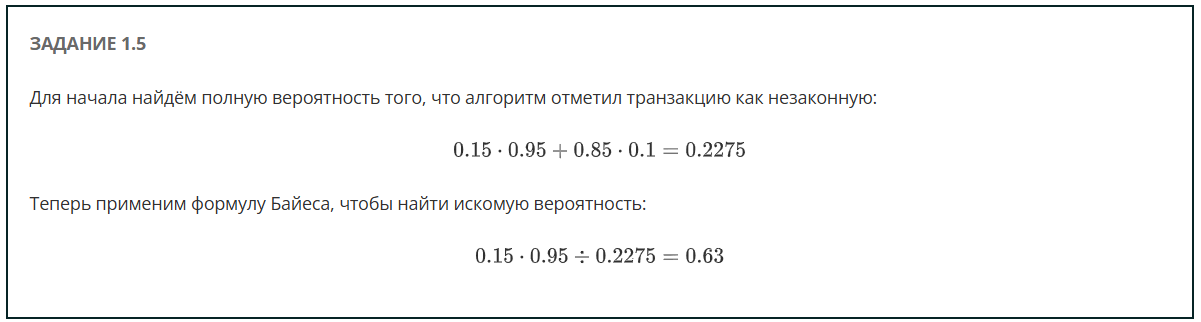

⭐ Вы справились с тестированием — поздравляем! Теперь вы точно можете быть уверены, что ваша подготовка достаточна для освоения данного модуля. Прежде чем приступить, давайте обозначим основные цели на следующие семь юнитов:

1. Изучить основную терминологию, связанную с ансамблями моделей.
Мы повторим уже знакомые вам основные понятия, которые используются в ансамблях, и познакомимся с рядом новых.

2. Подробно разобрать реализацию разных видов ансамблей с математической и смысловой точек зрения.
Мы намного подробнее, чем раньше, разберём все алгоритмы и изучим их математическую составляющую, чтобы лучше понимать принцип их работы, уметь более тонко их настраивать и за счёт этого добиваться наилучшей эффективности.

3. Научиться решать задачи регрессии и классификации с использованием ансамблей моделей.
Конечно же, полученные знания мы будем использовать для решения настоящих практических задач.

4. Научиться настраивать параметры моделей для повышения прогностической точности.
Мы рассмотрим параметры алгоритмов, которые можно регулировать, и разберёмся, как менять каждый из них для повышения точности предсказания.
Важно обозначить, что мы будем рассматривать три вида построения ансамблей: бэггинг, бустинг и стекинг. Для каждого из них мы изучим популярные вариации, программную реализацию и, конечно же, сравним их эффективность при решении задач.

В результате освоения этого модуля вы сможете применять ансамблевые методы для решения задач машинного обучения. Вы не просто будете знать плюсы и минусы ансамблевых методов и то, какие из них уместны в том или ином случае, но также будете понимать их суть и математическую составляющую.

Итак, вперёд к ансамблям! →

# 2. Ансамбли моделей. Бутстреппинг. Бэггинг

✍ В этом юните вы углубите свои знания ансамблей алгоритмов. Вы познакомитесь с тем, как формируются бутстреп-выборки, а также досконально изучите принцип **бэггинга** — самого простого варианта ансамблей.

В основе бэггинга лежит статистический метод, который называется **бутстрепом (bootstrap)**. Идея бутстрепа заключается в генерации выборок размера n из исходного датасета размера N путём случайного выбора элементов с повторениями в каждом из наблюдений.

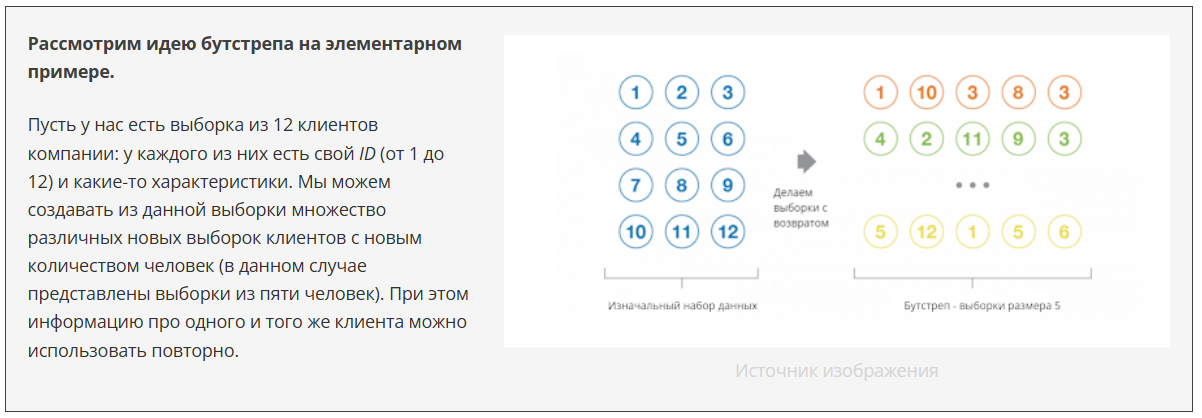

Это намного проще, чем находить новые выборки. По сути, мы собираем данные лишь единожды, а затем на их основе генерируем много выборок для обучения моделей. Это экономит огромные объёмы ресурсов и времени.

При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными — это важное допущение.

Выборки можно назвать **независимыми**, если результаты испытаний и измерения, осуществляемые для одной выборки, никак не влияют на результаты, получаемые на другой выборке.


**Репрезентативность** заключается в соответствии характеристик выборки всей генеральной совокупности. К примеру, если мы хотим исследовать мнение всех женщин России по какому-то вопросу, то все женщины России — это **генеральная совокупность**.

**Репрезентативная выборка** — это такая группа женщин, для которой основные характеристики соответствуют характеристикам для генеральной совокупности. Допустим, если среди всех российских женщин 60 % имеют детей, а 40 % — не имеют, то соотношение в выборке должно быть таким же.

Бутстреп-выборки часто используются для оценки различных статистических показателей, например разброса или доверительного интервала.

Если вычислять статистические оценки на нескольких независимых выборках, то мы можем, например, оценить их математическое ожидание или разброс. Приведём пример того, как это происходит с точки зрения математики.

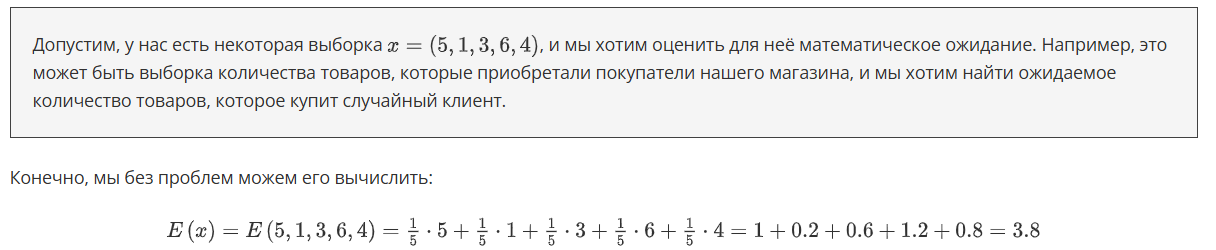

Однако это значение лишь на одной выборке, а мы хотели бы вычислить эту статистическую оценку на нескольких выборках и затем проанализировать разброс оценок.

Создаём несколько выборок с помощью бутстрепа и на каждой оцениваем математическое ожидание:

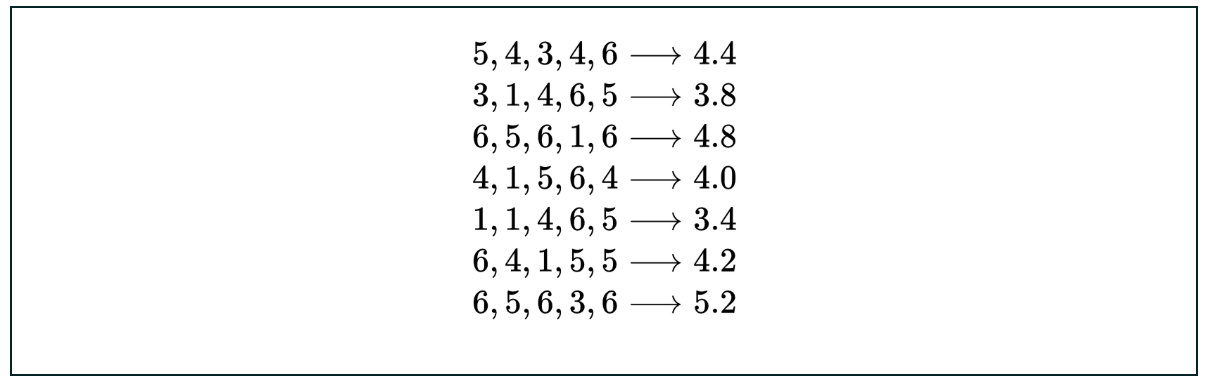

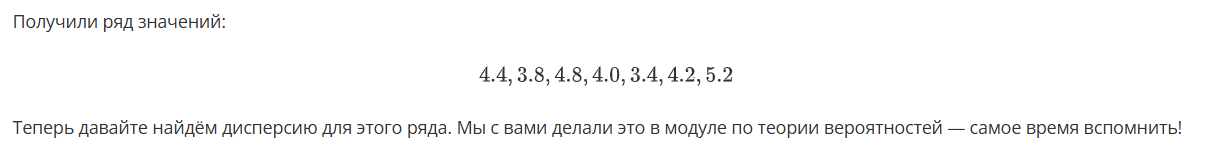

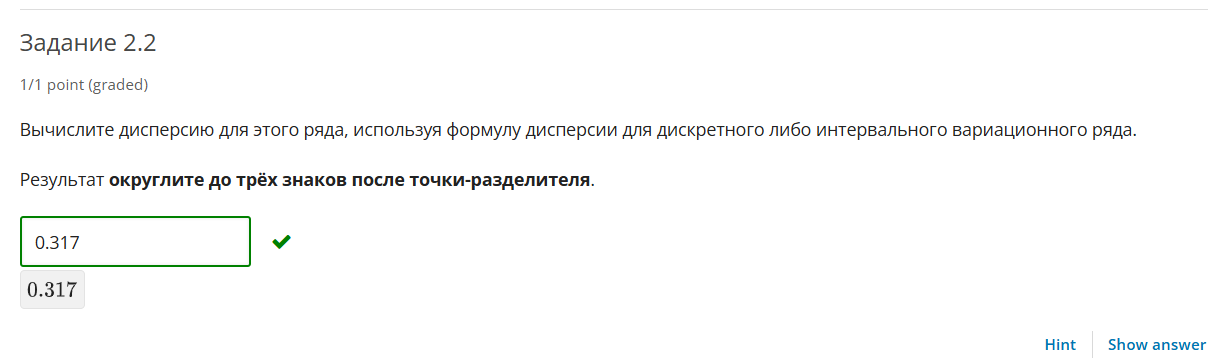

In [1]:
import numpy as np
a = np.array([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
b = a.mean()
np.sum((a - b)**2)/7

np.float64(0.31673469387755115)

Таким образом, мы понимаем, что если мы будем создавать различные новые выборки и вычислять для них средние значения, то для полученных значений дисперсия будет равна найденному вами выше значению. **Заметьте: мы узнали это, не собирая никаких новых данных**.

Формализуем только что проделанные действия математически:

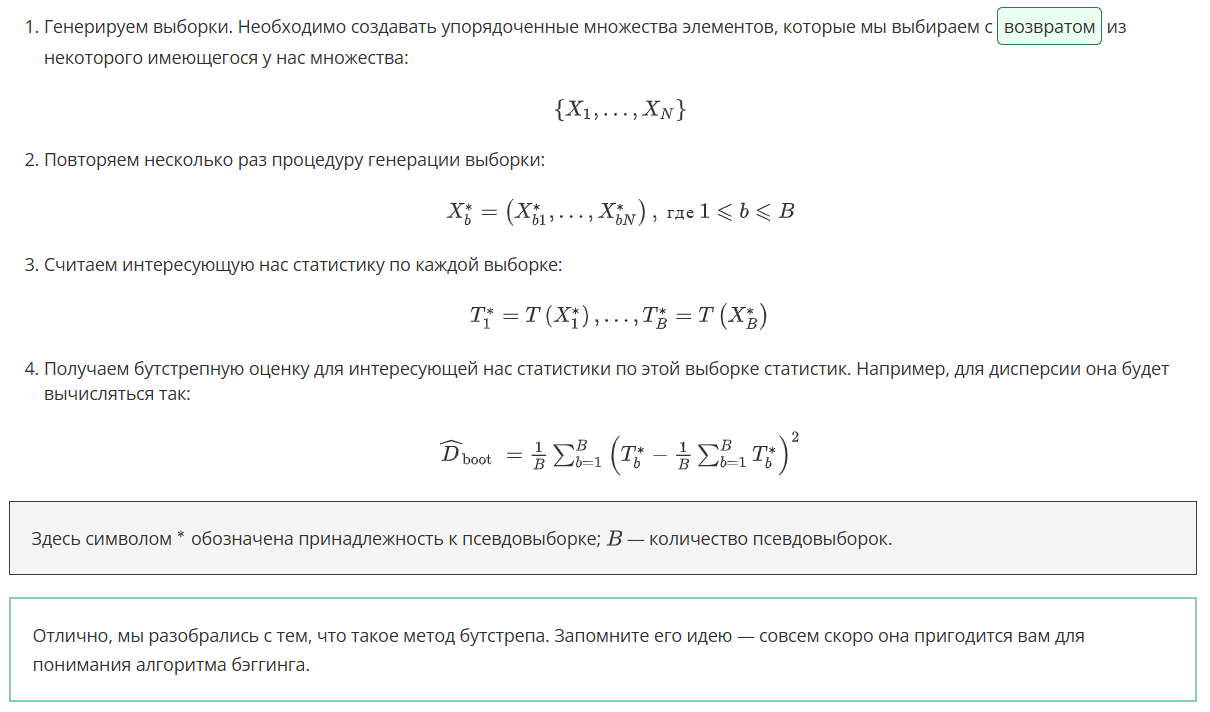

### Bias и Variance

Прежде чем перейти непосредственно к ансамблям моделей, нам необходимо повторить bias-variance decomposition, или, как его называют по-русски, «разложение ошибки на смещение и разброс». Оно очень полезно для анализа ансамблей моделей.

Смещение — это разница между математическим ожиданием для прогноза и реальным значением:

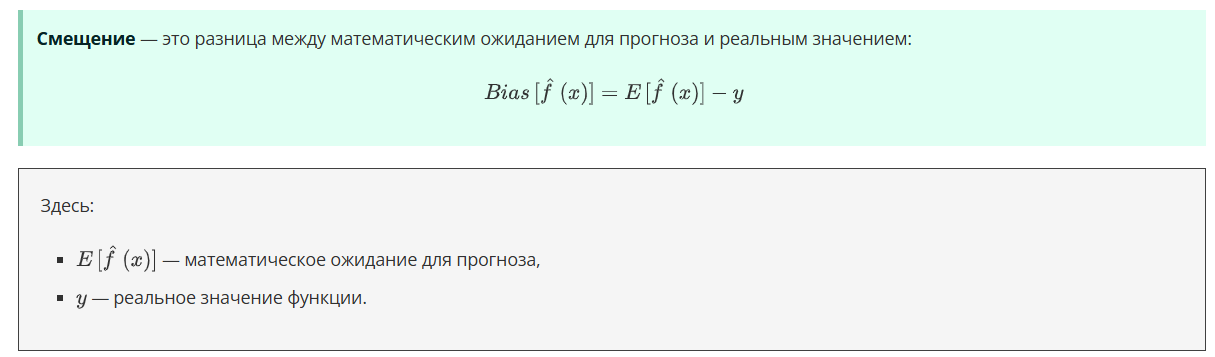

**Смысл смещения** — способность получить лучшую среди всех возможных моделей, то есть максимально точные прогнозы.

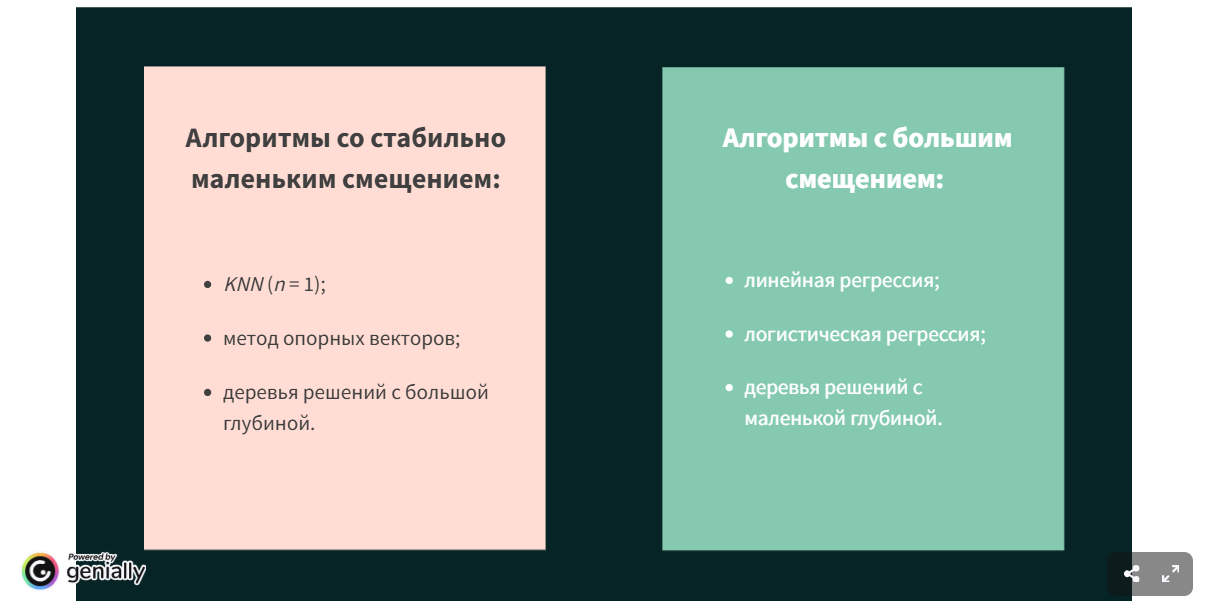

Также значение смещения часто называют **ошибкой смещения** или **ошибкой из-за смещения**.

Если у модели большое смещение, это значит, что ошибка будет достаточно велика из-за слишком сильного упрощения модели.

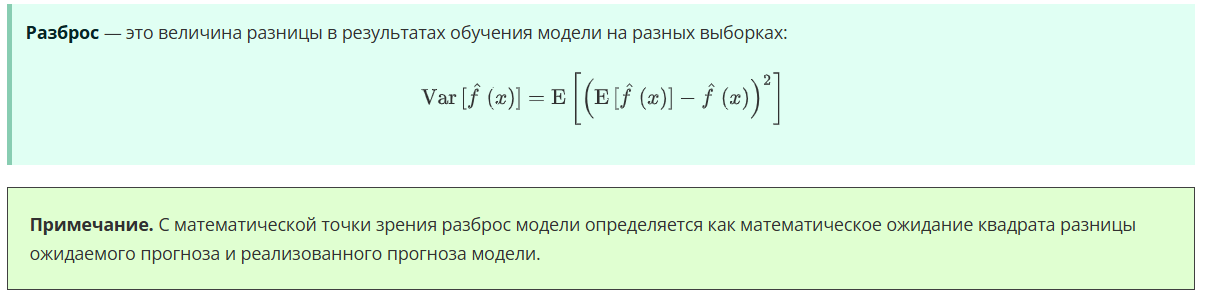

Разброс характеризует устойчивость модели к изменениям в обучающей выборке:

- Если результат сильно зависит от того, какие объекты присутствуют в выборке, разброс будет большим.
- Если алгоритм работает стабильно вне зависимости от особенностей выборки, разброс будет маленьким.


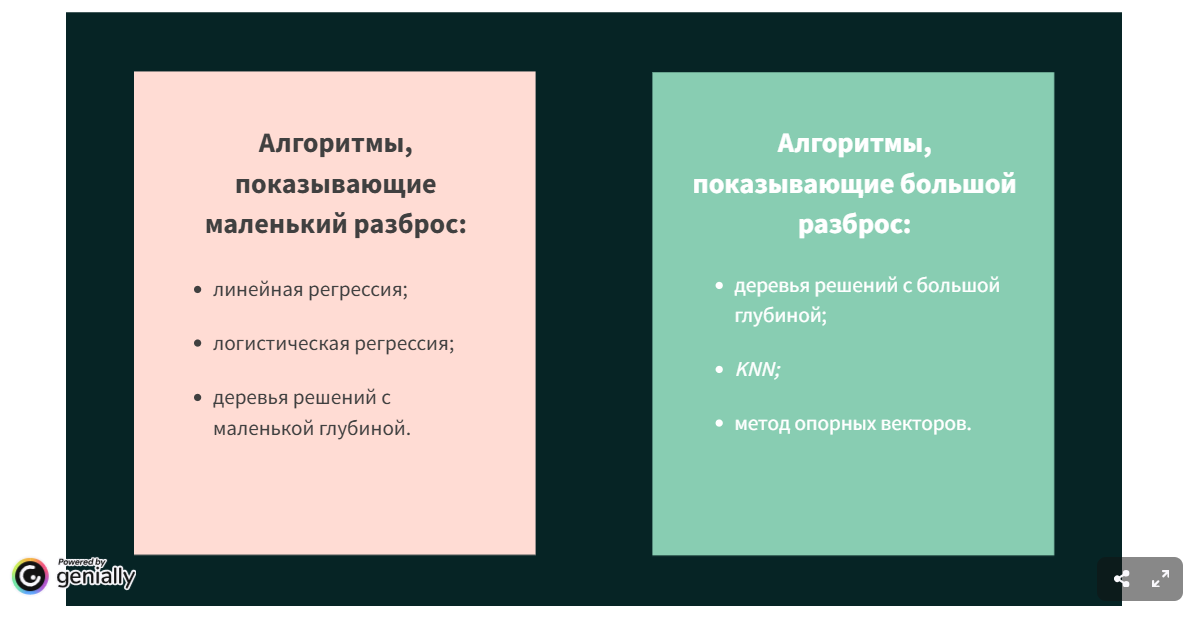

Давайте рассмотрим разложение на смещение и разброс для линейной регрессии.

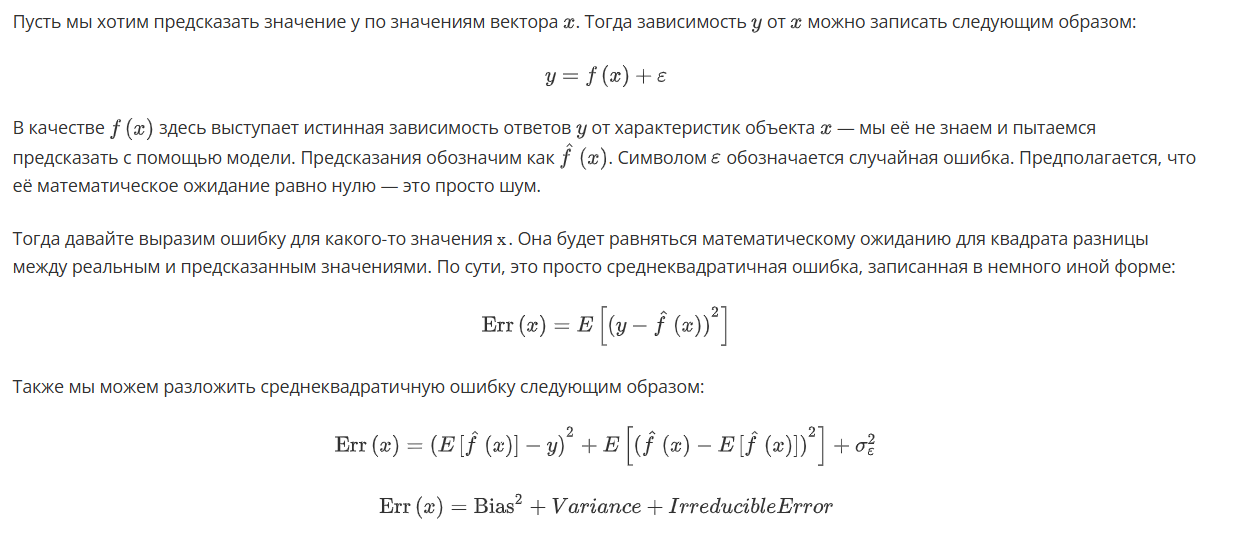

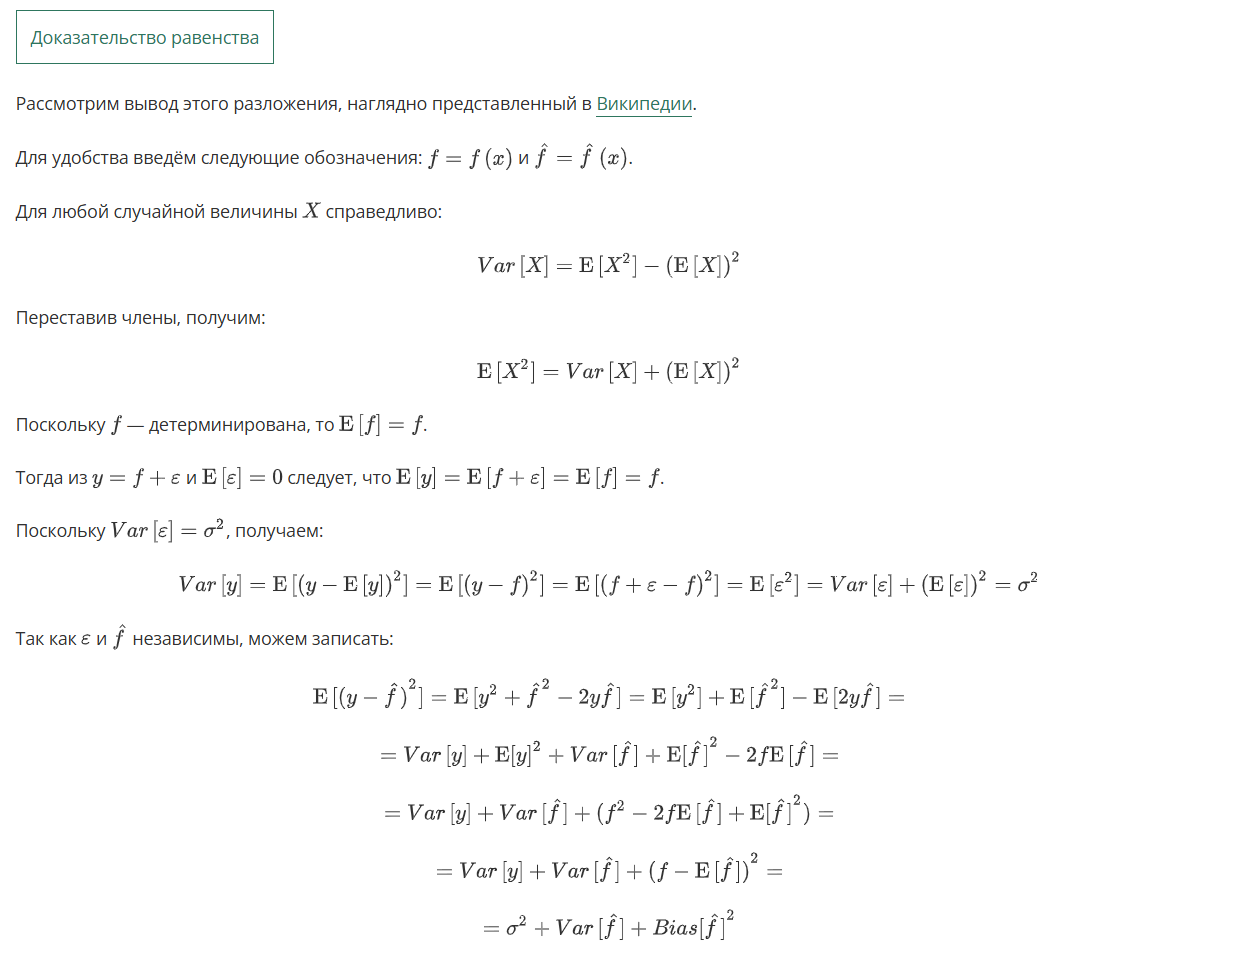

https://ru.wikipedia.org/wiki/Дилемма_смещения–дисперсии

Итак, мы получили, что наша ошибка — это сумма квадрата смещения, разброса и неустранимой случайной ошибки. Теперь мы понимаем, из чего состоит ошибка модели. Такое представление помогает нам исследовать с теоретической точки зрения некоторые алгоритмы машинного обучения и часто используется при изучении ансамблей.

Рассмотрим иллюстрацию того, как сдвиг и разброс влияют на качество предсказания. На рисунке ниже вы видите цель (красный круг), в которую мы хотим попасть.

Есть четыре ситуации:

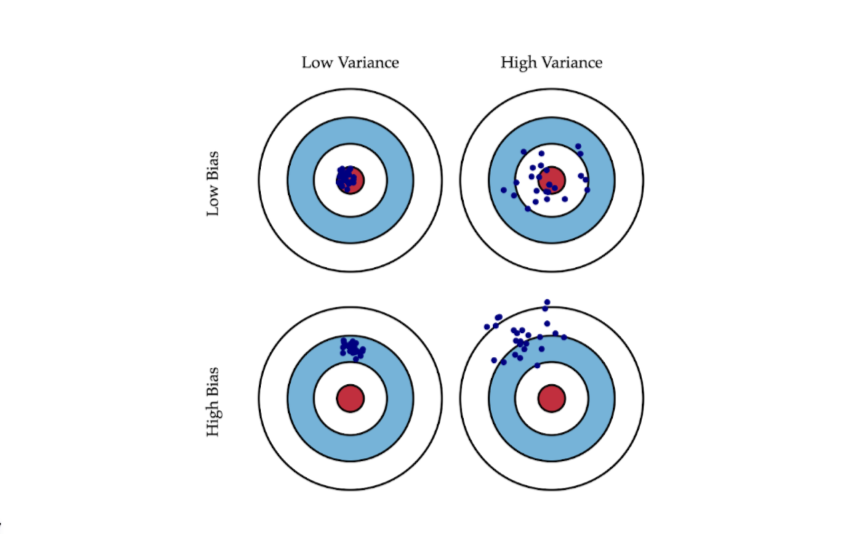

В моделях машинного обучения принцип тот же, только в качестве центра мишени выступает минимально возможная ошибка.

Когда говорят про разложение на bias и variance, то часто упоминают некую точку баланса:

Если модель очень простая, с маленьким количеством параметров, то, скорее всего, у неё будет очень большое смещение, но маленький разброс.
Если модель очень сложная, со множеством параметров, у неё будет большой разброс и маленькое смещение.
Схематично эти зависимости можно изобразить следующим образом (это схема не для конкретной модели, а лишь иллюстрация тенденций):



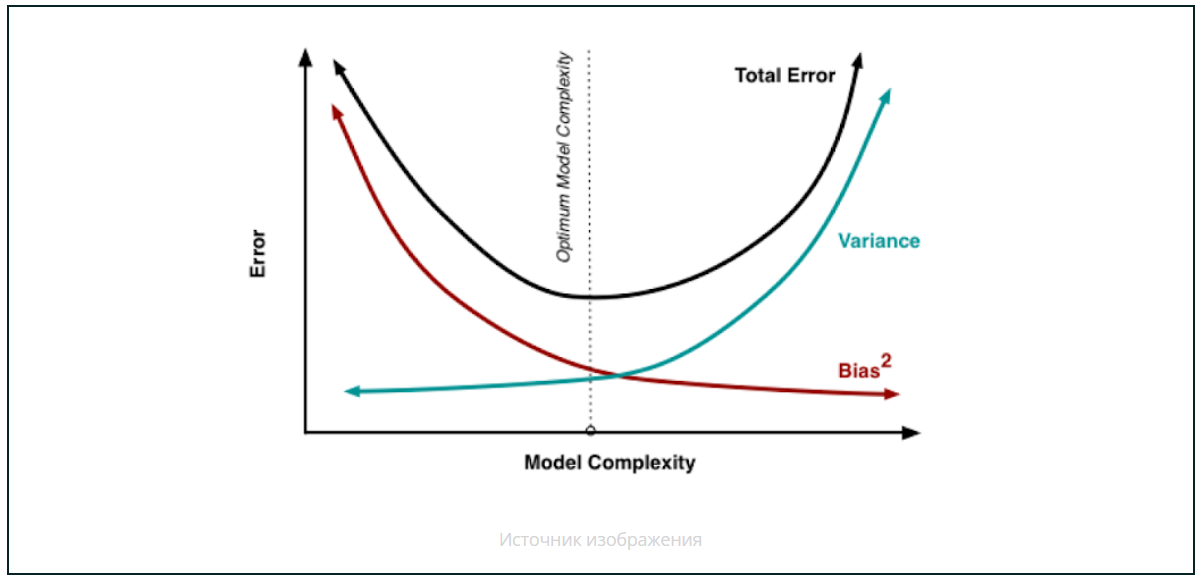

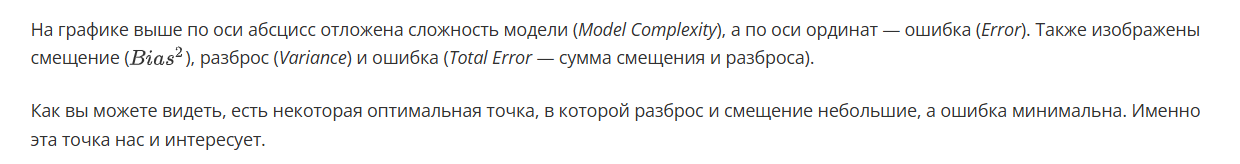

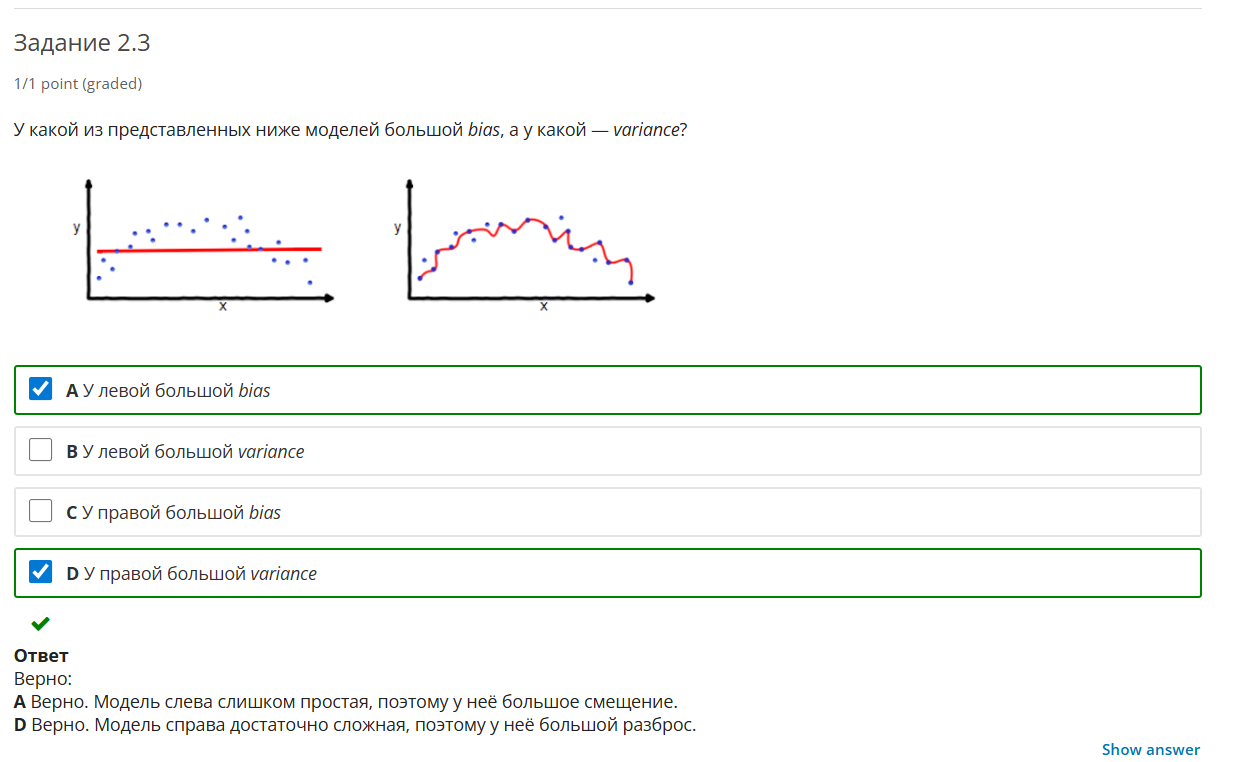

### Бэггинг

Перейдём к понятию **бэггинг**.

При построении моделей всегда есть вероятность, что при обучении на других данных получились бы другие результаты. Для того чтобы нивелировать такую вероятность, можно использовать бэггинг.

Его идея состоит в том, что мы берём несколько независимых моделей и усредняем полученные по ним результаты. Таким образом мы получаем модель, имеющую меньший разброс, так как при её построении мы учли несколько моделей.

Как уже было сказано, в реальности получить много независимых выборок слишком сложно, так как найти столько данных обычно невозможно. Поэтому мы используем бутстреп-выборки, о которых говорили в начале юнита.

Важно отметить, что при бэггинге размер каждой бутстреп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:

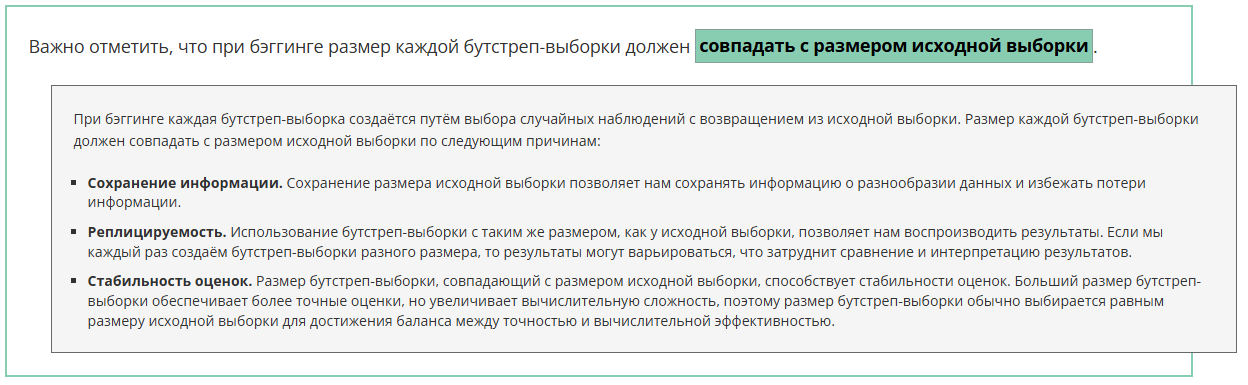

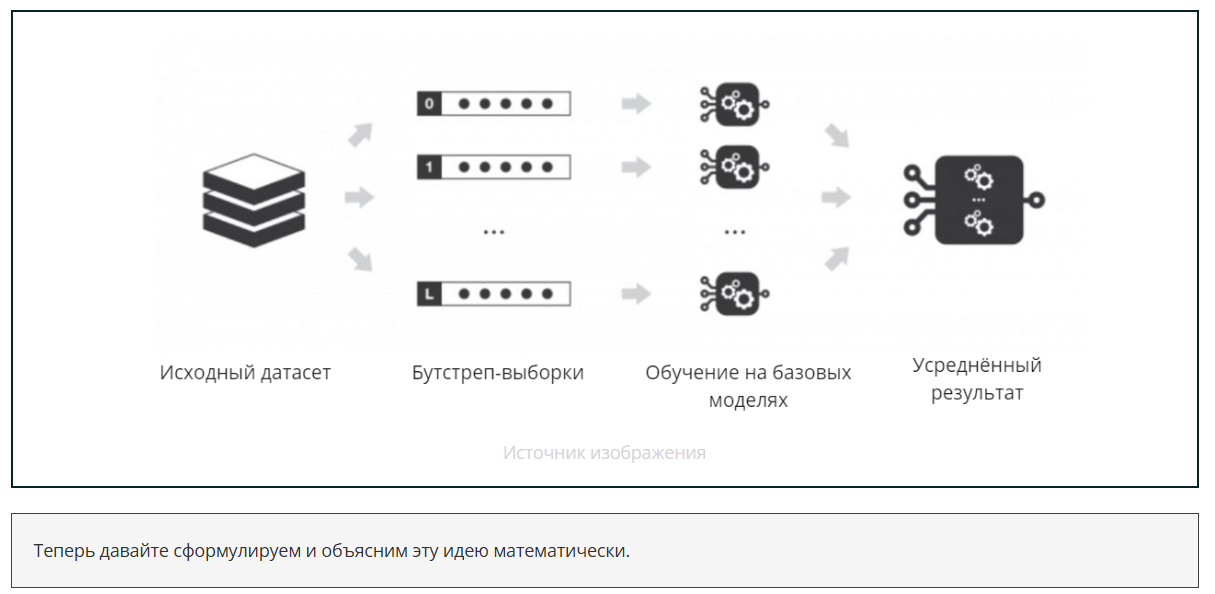

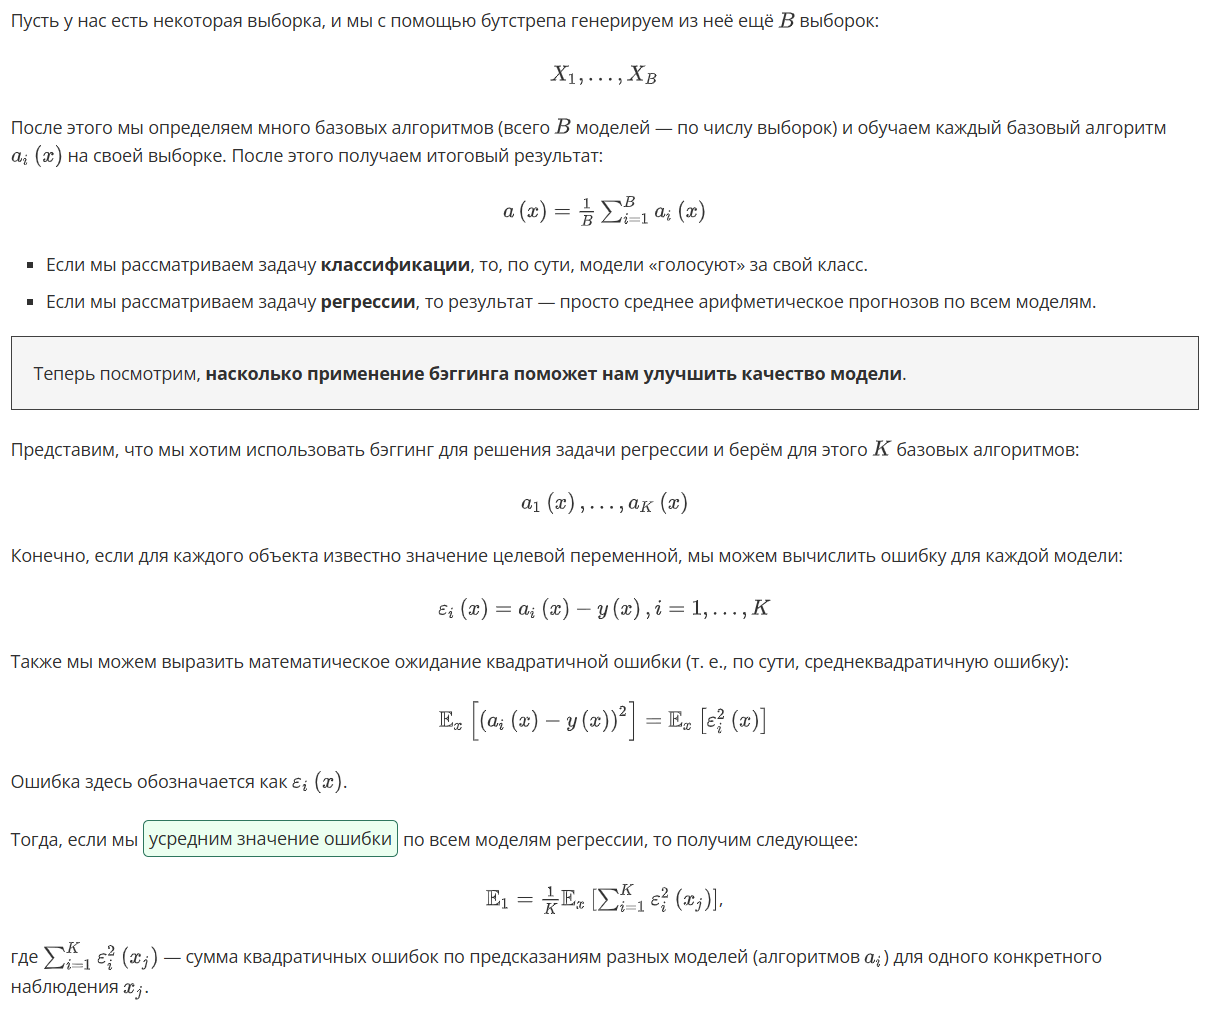

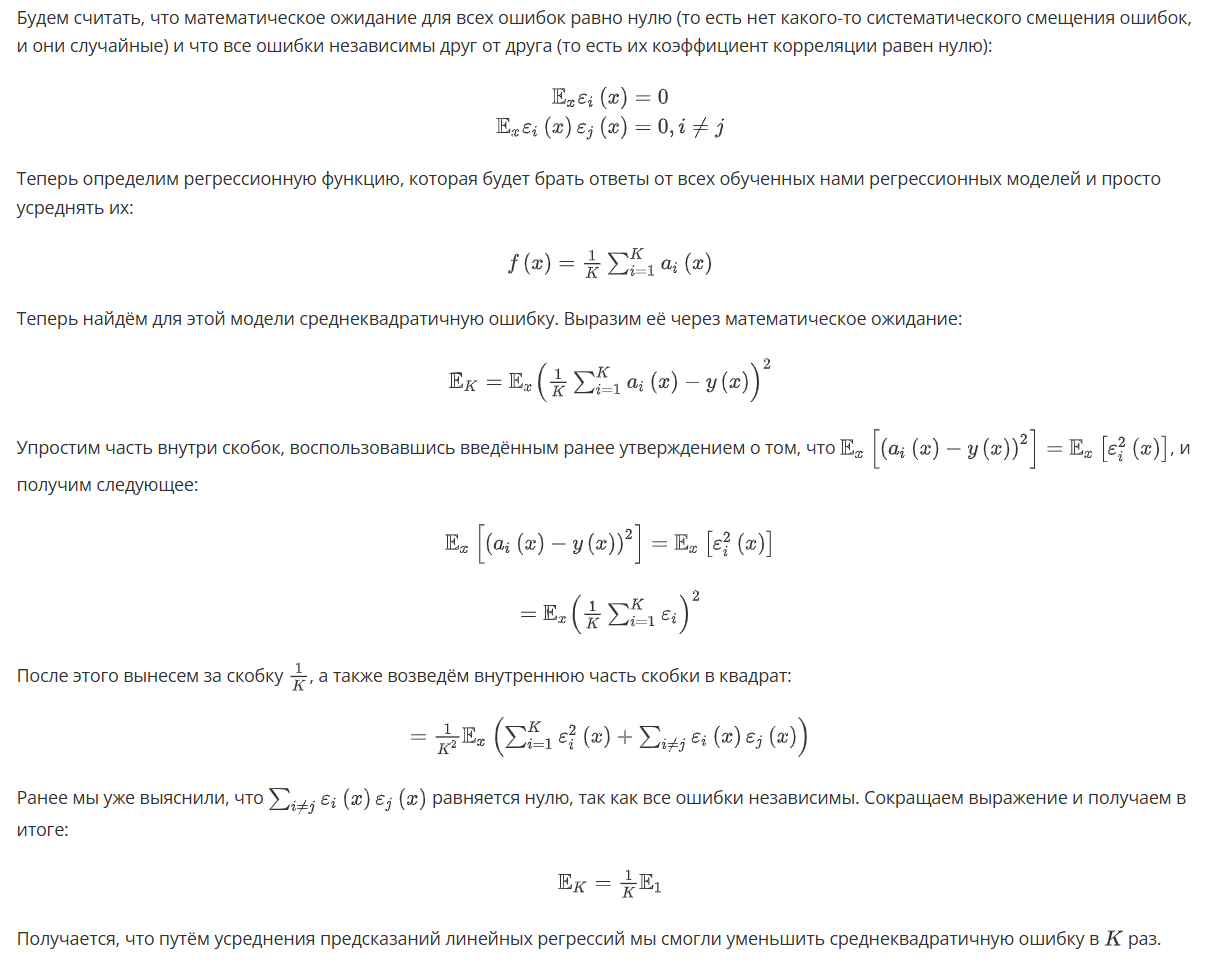

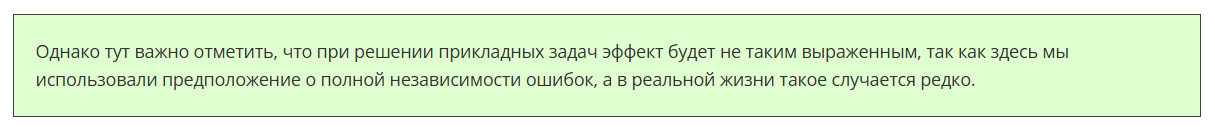

Также, чтобы иметь полное представление о характеристиках рассматриваемого алгоритма, давайте вспомним про разложение ошибки на смещение и разброс.

Доказано, что бэггинг не ухудшает показатель смещения модели, то есть смещение у ансамбля ровно такое же, как и у одного базового алгоритма.

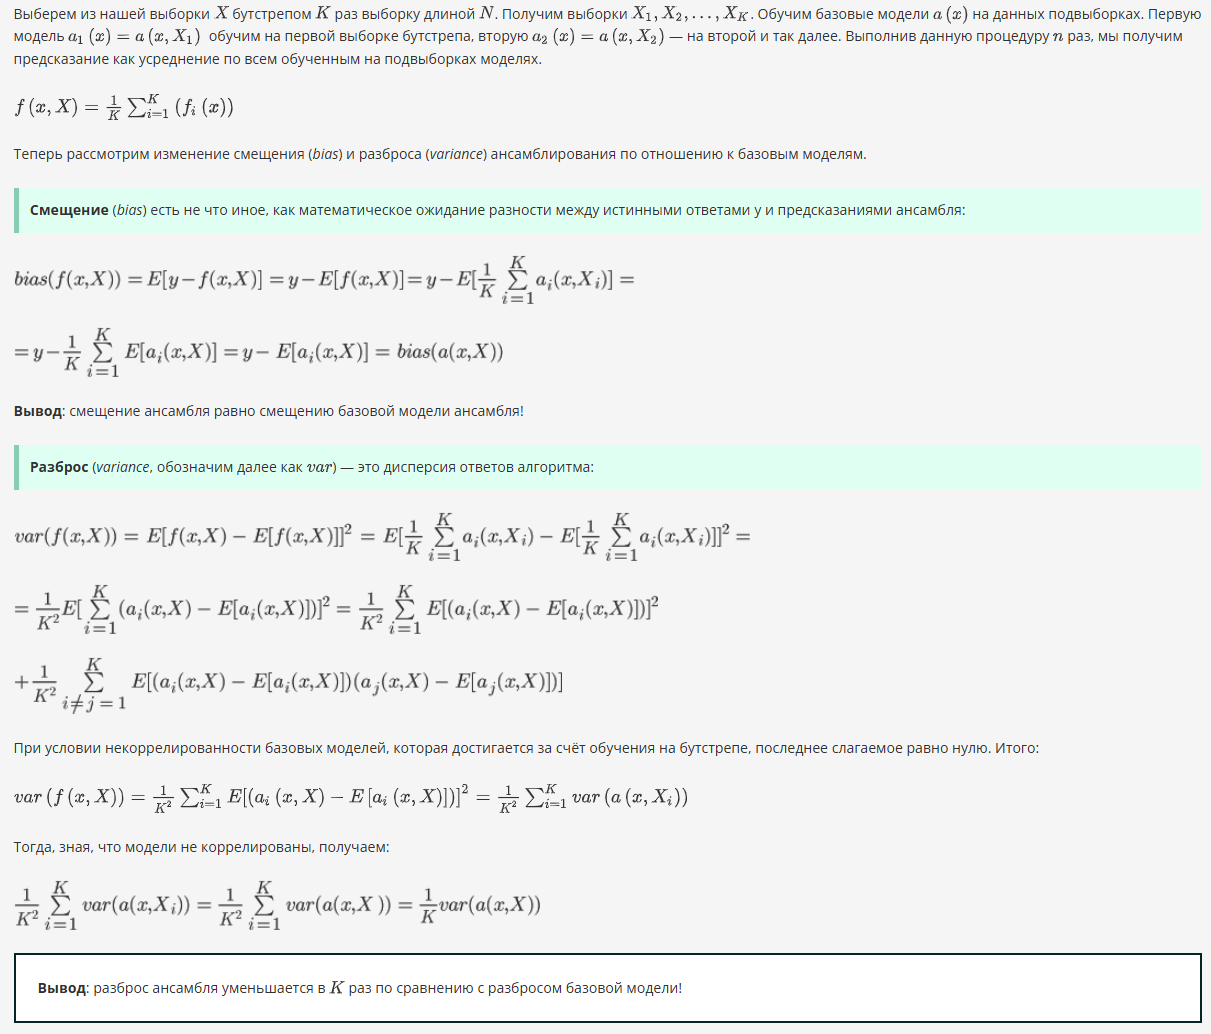

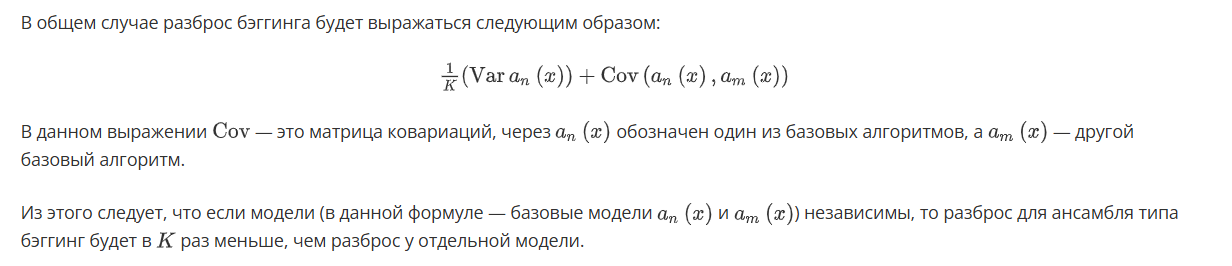

Резюмируем:

- Бэггинг даёт уменьшение ошибки в **K** раз по сравнению с одиночной моделью.
- Бэггинг не уменьшает смещение по сравнению с одиночной моделью.
- Бэггинг уменьшает разброс в **K** раз по сравнению с одиночной моделью.

Важно отметить, что эти утверждения выведены и доказаны теоретически и будут выполняться на практике только в том случае, если между ошибками нулевая корреляция.

Как видим, бэггинг — очень эффективный и полезный алгоритм, так что есть смысл попрактиковаться с ним.

Объёмная и содержательная практика у нас ещё впереди, но в качестве разминки давайте поработаем с уже известным вам датасетом о вине, который можно скачать здесь.

Ранее вы обучали на данных только один алгоритм, а теперь мы попробуем сравнить несколько.

В рамках следующих двух заданий сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.

In [7]:
# загрузим данные
import pandas as pd
df = pd.read_csv('data/wineQualityReds.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


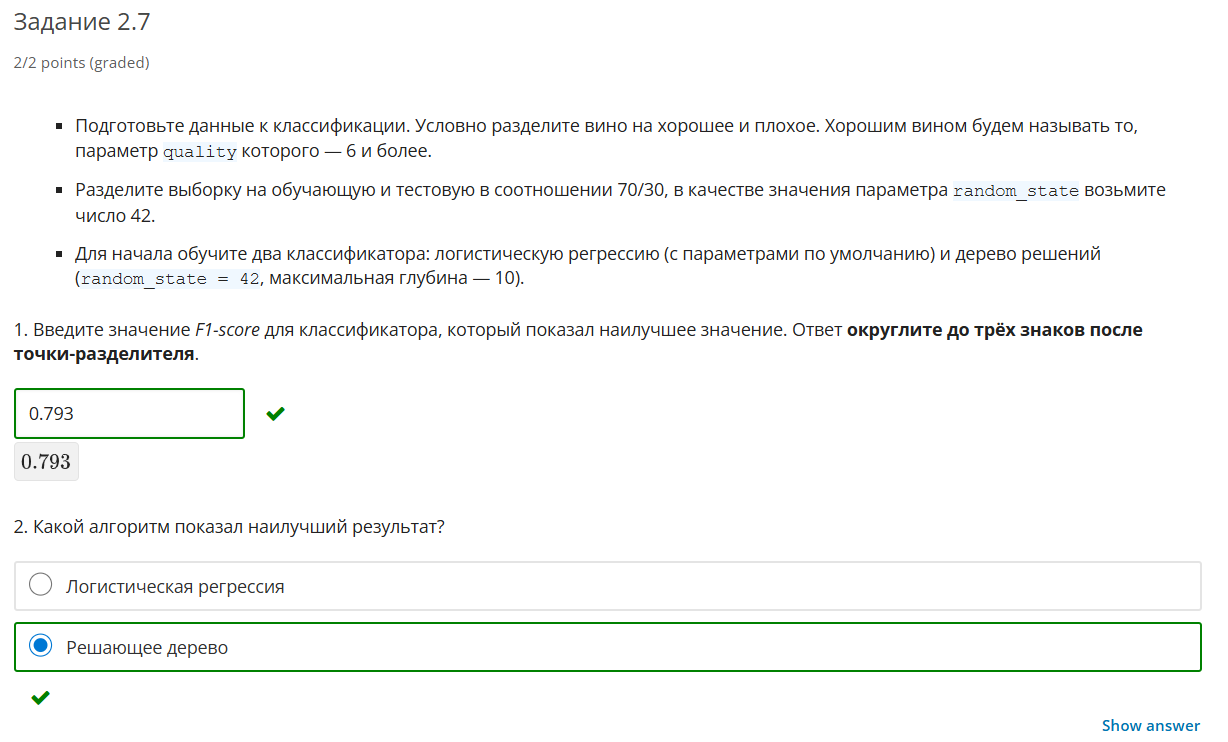

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

df['target']= np.where(df.quality >=6,1,0)
Y= df['target']
X = df.drop(['target', 'quality'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

C:\Users\tgorbunov\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7485822306238186

In [13]:
model = DecisionTreeClassifier(max_depth = 10, random_state=42)
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

0.7927927927927928

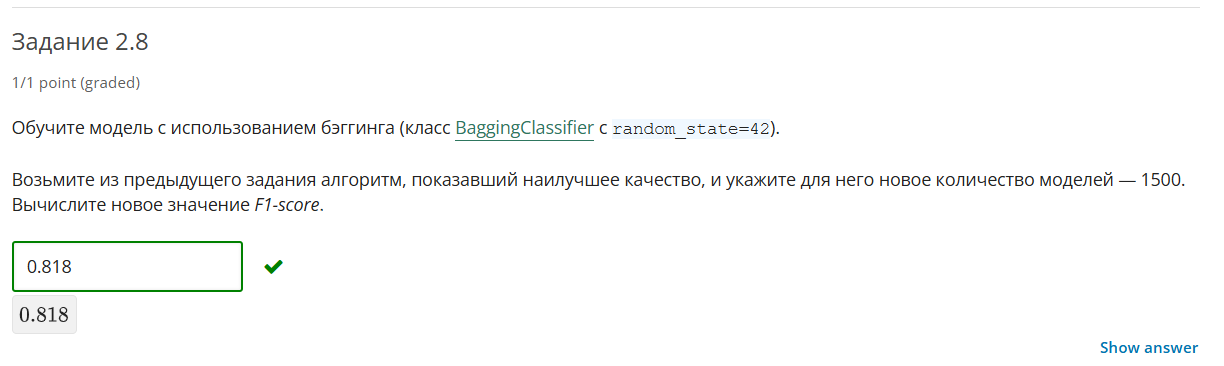

In [16]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth = 10, random_state=42), n_estimators=1500, random_state=42).fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
f1_score(preds_test, y_test)

0.8181818181818182

⭐ Прекрасно! Теперь вы разбираетесь в алгоритме бэггинга и знаете, как формируются бутстреп-выборки, и готовы перейти к следующему юниту, где ваш ждёт один из видов бэггинга — случайный лес →

# 3. Случайный лес

✍ В предыдущем юните мы поговорили о бэггинге — одном из видов ансамблей моделей. В этом юните мы будем разбирать модификацию бэггинга — **случайный лес**.